## Drifters and Cmems data Notebook

### Introduction
This notebook aims to analyze the velocity data from drifters within the tropical Atlantic Ocean. It involves visualizing drifter velocity data, interpolating CMEMS data onto drifter data, and comparing the velocities between drifters and CMEMS.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Data Product: Global Drifter Program Current of NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 230
  - link : https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - Periode : period : 01-01-2022 to 01-01-2023

- CMEMS Data:
  - Source: Copernicus Marine
  - Collection Frequency: Every 12 hours
  - Data Product: SEALEVEL_GLO_PHY_L4_MY_008_047
  - link :  https://doi.org/10.48670/moi-00148
  - download data : ahttps://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/download
  - Periode : period : 01-01-2022 to 01-01-2023

### Tasks

#### 1. Visualization of Drifter Velocity Data
- Plot the Eastward (ve) and Northward (vn) velocity as a function of time for a selected drifter.

#### 2. Interpolation of CMEMS Data on Drifter Data
- Interpolate CMEMS data onto the time series of the selected drifter data.

#### 3. Comparison between Drifter Velocities and Interpolated CMEMS Velocities
- Visualize the correlation and regression between drifter velocities (ve, vn) and interpolated CMEMS between the two datasets.
- Plot time series of both drifter velocities and interpolated CMEMS velocities.

## Import Library


In [64]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation
from scipy.stats import linregress
from scipy.stats import pearsonr

## Read Drifter Data


In [65]:
fn='./drifter_6hour_qc_a65f_894f_fcdf_U1719475759871.nc';
ds=xr.open_dataset(fn);

C:\ProgramData\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
C:\ProgramData\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


## Extract Coordinates and Variables


In [66]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values

## Creation of Pandas Array for Drifter Data


In [67]:
data = {
    'longitude': lon,
    'latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)

## Selecting Drifter Data


In [68]:
# Test: Our selected drifter has 613 observations.  

df_1 = df[53965:54778]

# Arrange to begin with index 0

In [69]:
ve_curr_2 = df_1.ve.values
vn_curr_2 = df_1.vn.values
sst_2 = df_1.sst.values
lon_2 = df_1.longitude.values
lat_2 = df_1.latitude.values
time_2 = df_1.time.values

In [70]:
data = {
    'longitude': lon_2,
    'latitude' : lat_2,
    'time'     : time_2,
    've'       : ve_curr_2,
    'vn'       : vn_curr_2,
    'sst'      : sst_2
}

df_2 = pd.DataFrame(data)
df_2

,longitude,latitude,time,ve,vn,sst
0,-55.837,18.012,2022-01-01 00:00:00,-0.18000,0.17501,26.919
1,-55.870,18.034,2022-01-01 06:00:00,-0.16960,0.11943,26.932
2,-55.907,18.058,2022-01-01 12:00:00,-0.15112,0.04225,26.936
3,-55.932,18.051,2022-01-01 18:00:00,-0.13265,-0.05243,26.936
4,-55.961,18.038,2022-01-02 00:00:00,-0.09443,-0.08665,26.958
...,...,...,...,...,...,...
808,-62.615,18.135,2022-07-22 00:00:00,-0.14837,0.10376,28.743
809,-62.643,18.137,2022-07-22 06:00:00,-0.20508,-0.03377,28.492
810,-62.698,18.121,2022-07-22 12:00:00,-0.34088,-0.04629,28.384
811,-62.782,18.119,2022-07-22 18:00:00,-0.38639,0.00328,28.401


## Space evolution of Eastward (ve) and Northward (vn) Velocity 

## Case of ve

The drifter is moving mainly westward.


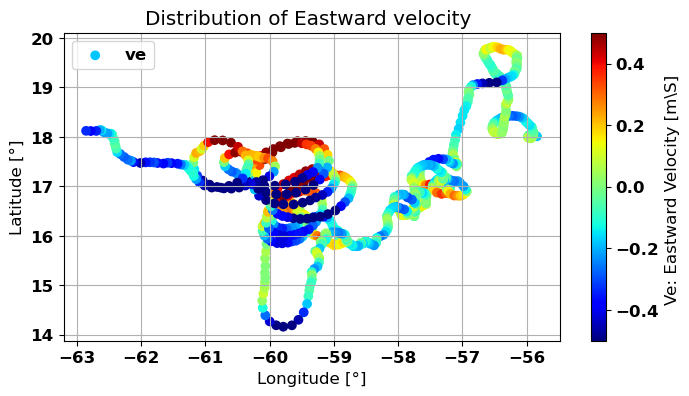

In [71]:
# Assuming you have a DataFrame named df with 'time' and 've' columns
# Plot ve as a function of time
plt.figure(figsize=(8, 4))
plt.scatter(df_2['longitude'], df_2['latitude'], c= df_2['ve'],vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and legend
plt.title('Distribution of Eastward velocity ')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.colorbar(label='Ve: Eastward Velocity [m\S] ')

# Example of drifter trajectory data (latitude, longitude)
longitude = df_2['longitude']
latitude = df_2['latitude']

# Calculating position changes
delta_lat = np.diff(latitude)
delta_lon = np.diff(longitude)

# Determining the general direction of movement
if np.abs(delta_lat.sum()) > np.abs(delta_lon.sum()):
    if delta_lat.sum() > 0:
        direction = "northward"
    else:
        direction = "southward"
else:
    if delta_lon.sum() > 0:
        direction = "eastward"
    else:
        direction = "westward"

print(f"The drifter is moving mainly {direction}.")        

plt.legend(['ve'])
plt.savefig("fig6 mode.png")
plt.show()

## Case of vn

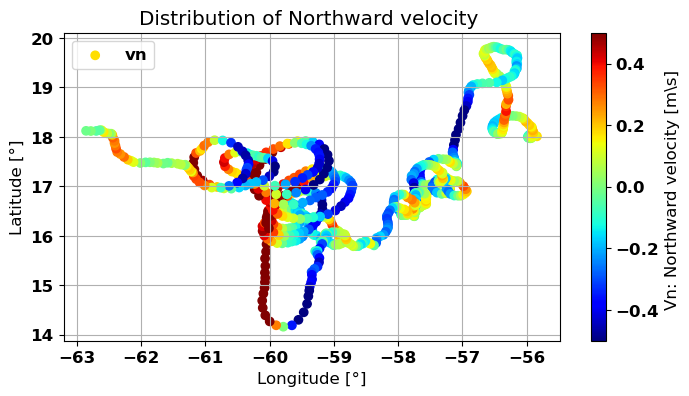

In [72]:
# Assuming you have a DataFrame named df with 'time' and 've' columns
# Plot ve as a function of time
plt.figure(figsize=(8, 4))
plt.scatter(df_2['longitude'], df_2['latitude'], c= df_2['vn'],vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and legend
plt.title('Distribution of Northward velocity ')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.colorbar(label='Vn: Northward velocity [m\s] ')

plt.legend(['vn'])
plt.savefig("fig7 mode.png")
plt.show()

## Now let's interpolate the CMEMS data onto the grid of the drifter data.

### Case of Geostrophic Velocity Anomalies: Zonal Component (ugosa) 


- In this step, we interpolate the ugosa variable from the CMEMS data to the ve variable of the selected drifter.

- We utilize the linear interpolation method for this process. The interpolation is performed based on the variables of longitude, latitude, and important timestamps.

- This allows us to make comparisons and identify differences between drifter variables and CMEMS variables obtained through interpolations.

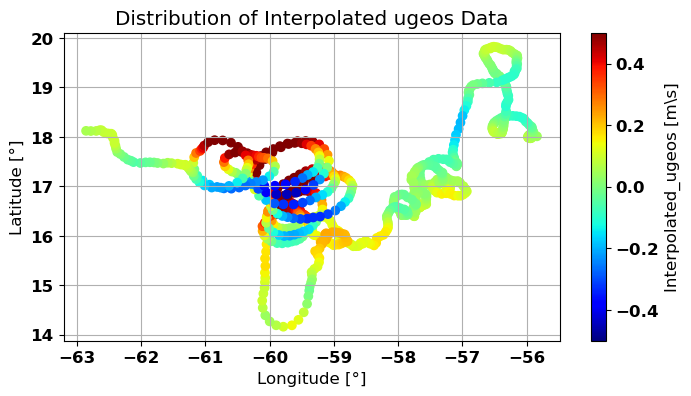

In [73]:
# Chargement des données des bouées dérivantes à partir du DataFrame
df_bouees = df_2  
 
# Chargement des données satellitaires à partir du fichier netCDF
ds_satellitaires = xr.open_dataset('cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1719675910724.nc')   
 
# Extraction des données de courant des bouées
bouees_courant_u = df_bouees['ve']

# Extraction des données de courant satellitaires pour les mêmes positions spatiales et temporelles que les bouées
latitudes = df_bouees['latitude']
longitudes = df_bouees['longitude']
temps = df_bouees['time']

satellitaires_courant_1 = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_satellitaires['ugosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_1.append(courant)

# Plot the interpolated data
plt.figure(figsize=(8, 4))
plt.scatter(df_2['longitude'], df_2['latitude'], c= satellitaires_courant_1,vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and colorbar
plt.title('Distribution of Interpolated ugeos Data')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.colorbar(label='Interpolated_ugeos [m\s]')
plt.savefig("fig8 mode.png")
plt.show()

### Case of Geostrophic Velocity Anomalies: Meridional Component (vgosa) 

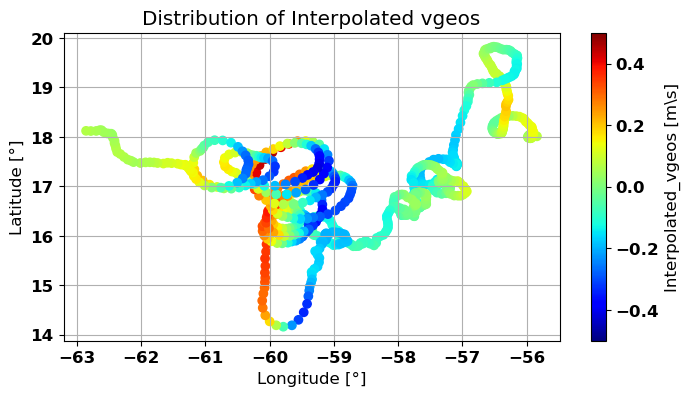

In [74]:
# Chargement des données des bouées dérivantes à partir du DataFrame
df_bouees = df_2
# Supposez que votre DataFrame contient des colonnes 'temps', 'latitude', 'longitude' et 'vn'

# Chargement des données satellitaires à partir du fichier netCDF
ds_satellitaires = xr.open_dataset('cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1719675910724.nc')   
# Supposez que vos données satellitaires sont stockées dans une variable appelée 'u_current'

# Extraction des données de courant des bouées
bouees_courant_v = df_bouees['vn']

# Extraction des données de courant satellitaires pour les mêmes positions spatiales et temporelles que les bouées
latitudes = df_bouees['latitude']
longitudes = df_bouees['longitude']
temps = df_bouees['time']

satellitaires_courant_2 = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_satellitaires['vgosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_2.append(courant)

# Plot the interpolated data
plt.figure(figsize=(8, 4))
plt.scatter(df_2['longitude'], df_2['latitude'], c= satellitaires_courant_2,vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and colorbar
plt.title('Distribution of Interpolated vgeos')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.grid(True)
plt.colorbar(label='Interpolated_vgeos [m\s]')
plt.savefig("fig9 mode.png")
plt.show()

## Characteristic of the whirlwind

## Amplitude

In [75]:
import numpy as np

def calculer_amplitude(vecteur_courant):
    """
    Calcule l'amplitude du tourbillon à partir d'un vecteur courant 1D.

    Args:
    vecteur_courant (numpy.ndarray): Tableau 1D contenant les hauteurs mesurées au fil du temps.

    Returns:
    float: L'amplitude du tourbillon.
    """
    hauteur_bord = np.max(vecteur_courant)
    hauteur_centre = np.min(vecteur_courant)
    
    amplitude = hauteur_bord - hauteur_centre
    return amplitude

# Exemple d'utilisation
vecteur_courant = df_2['ve']  # Exemple de données

amplitude = calculer_amplitude(vecteur_courant)
print(f"L'amplitude du tourbillon est : {amplitude} unités")

L'amplitude du tourbillon est : 1.4578799999999998 unités


## EKE

In [76]:
import numpy as np

def calculer_eke_totale(u, v):
    """
    Calcule l'énergie cinétique totale des tourbillons à partir des vecteurs de vitesse u et v.
    
    Args:
    u (numpy.ndarray): Vecteur 1D des composantes de vitesse dans la direction x.
    v (numpy.ndarray): Vecteur 1D des composantes de vitesse dans la direction y.
    
    Returns:
    float: La valeur totale de l'énergie cinétique.
    """
    # Calculer les carrés des composantes de vitesse
    u2 = np.square(u)
    v2 = np.square(v)
    
    # Calculer l'énergie cinétique pour chaque point
    eke = 0.5 * (u2 + v2)
    
    # Calculer l'énergie cinétique totale en faisant la somme des valeurs
    eke_totale = np.sum(eke)
    
    return eke_totale

# Exemple de données
u = satellitaires_courant_1  # Composantes de vitesse dans la direction x
v = satellitaires_courant_2 # Composantes de vitesse dans la direction y

# Calcul de l'énergie cinétique totale
eke_totale = calculer_eke_totale(u, v)
print(f"L'énergie cinétique totale des tourbillons est : {eke_totale:.2f}")

L'énergie cinétique totale des tourbillons est : 29.57


## Now Let's Compare Drifter Speeds and  CMEMS Speeds

## Comparison between ve and ugosa


## Using Regression and Correlation

Corrélation de Pearson: 0.8072452179674003
Valeur de p (p-value): 6.761230197807907e-188


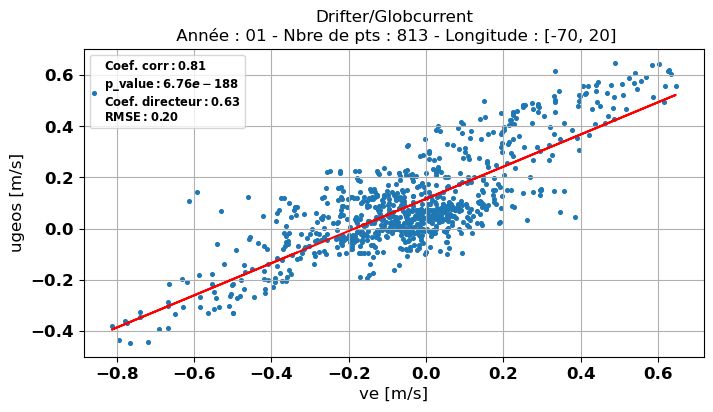

In [77]:
# According to the following, we can simply note that the correlation between "ve" and "ugosa_interpolate" is 0.81. 
# This means that there is a positive and strong relationship  between this two variables.
# Calcul de la corrélation spatiale et temporelle Pearson
correlation, p_value = pearsonr(bouees_courant_u, satellitaires_courant_1)

print("Corrélation de Pearson:", correlation) # R = 0.81
print("Valeur de p (p-value):", p_value)

# Fit linear regression model

slope, intercept, _, _, _ = linregress( bouees_courant_u,satellitaires_courant_1)

# Calcul de la régression linéaire
coefficients = np.polyfit(bouees_courant_u, satellitaires_courant_1, 1)
p = np.poly1d(coefficients) # p = 0.63

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(np.mean((bouees_courant_u - satellitaires_courant_1)**2)) # r = 0.20

# Plot data and linear regression line
plt.figure(figsize=(8, 4))
plt.scatter(bouees_courant_u,satellitaires_courant_1, s=7)
plt.plot(bouees_courant_u, slope*bouees_courant_u + intercept, color='red', label='Linear Regression')
plt.xlabel('ve [m/s]')
plt.ylabel('ugeos [m/s]')

# Légende
legend_text = (
    r'$\text{Coef. corr} : 0.81$' + '\n'
    r'$\text{p_value} : 6.76e-188$' + '\n'
    r'$\text{Coef. directeur} : 0.63$' + '\n'
    r'$\text{RMSE} : 0.20$'
)

# Affichage de la légende
plt.legend([legend_text], title='', fontsize='x-small', title_fontsize='x-small', handlelength=0, loc="upper left")

# Titre
title_text = 'Drifter/Globcurrent\n Année : 01 - Nbre de pts : 813 - Longitude : [-70, 20]'
plt.title(title_text, fontsize=12)
plt.grid(True)

# Set font size and font weight for tick labels
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.savefig("fig10 mode.png")
plt.show()

## Using Time Series

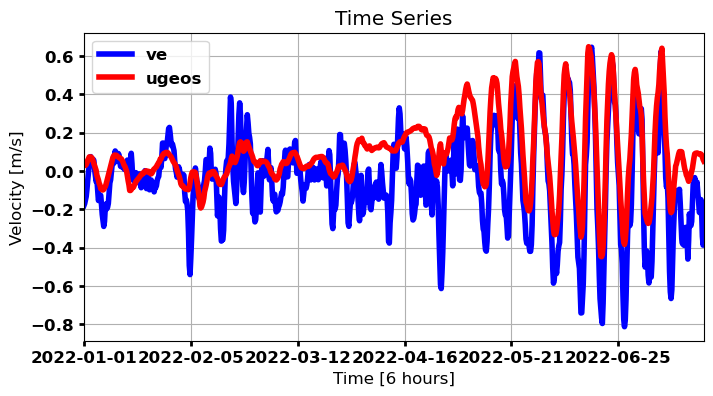

In [78]:
 # Plot time series
plt.figure(figsize=(8, 4))
plt.plot(df_2['time'], bouees_courant_u, color='Blue', label='ve', linewidth=4)
plt.plot(df_2['time'], satellitaires_courant_1, color='RED', label='ugeos', linewidth=4)
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Time Series')
plt.xlabel('Time [6 hours]')
plt.ylabel('Velocity [m/s]')
plt.grid(True)
plt.legend()

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-07-23'))
ax.set_xticks(pd.date_range(start='2022-01-01', end='2022-07-23', freq='840H'))
ax.set_xticklabels(pd.date_range(start='2022-01-01', end='2022-07-23', freq='840H').strftime('%Y-%m-%d'), rotation=0)

plt.savefig("fig11 mode.png")
plt.show()

## Comparison between vn and vgosa

## Using Regression and Correlation

Corrélation de Pearson: 0.8193464251773093
Valeur de p (p-value): 3.806646288844142e-198


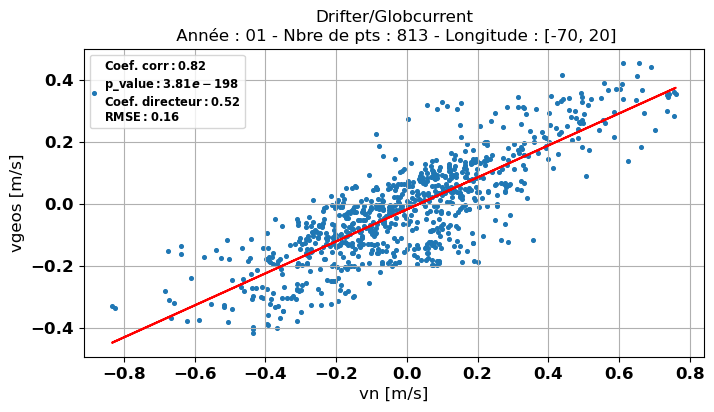

In [79]:
# According to the following, we can simply note that the correlation between "ve" and "ugosa_interpolate" is 0.82. 
# This means that there is a positive and strong relationship  between this two variables.
# Calcul de la corrélation spatiale et temporelle Pearson
correlation, p_value = pearsonr(bouees_courant_v, satellitaires_courant_2)

print("Corrélation de Pearson:", correlation)
print("Valeur de p (p-value):", p_value)

# Fit linear regression model

slope, intercept, _, _, _ = linregress( bouees_courant_v,satellitaires_courant_2)

# Calcul de la régression linéaire
coefficients = np.polyfit(bouees_courant_v, satellitaires_courant_2, 1)
p = np.poly1d(coefficients) # p = 0.52

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(np.mean((bouees_courant_v - satellitaires_courant_2)**2)) # r = 0.16

# Plot data and linear regression line
plt.figure(figsize=(8, 4))
plt.scatter(bouees_courant_v,satellitaires_courant_2, s=7)
plt.plot(bouees_courant_v, slope*bouees_courant_v + intercept, color='red', label='Linear Regression')
plt.xlabel('vn [m/s]')
plt.ylabel('vgeos [m/s]')

# Légende
legend_text = (
    r'$\text{Coef. corr} : 0.82$' + '\n'
    r'$\text{p_value} : 3.81e-198$' + '\n'
    r'$\text{Coef. directeur} : 0.52$' + '\n'
    r'$\text{RMSE} : 0.16$'
)

# Affichage de la légende
plt.legend([legend_text], title='', fontsize='x-small', title_fontsize='x-small', handlelength=0, loc="upper left")

# Titre
title_text = 'Drifter/Globcurrent\n Année : 01 - Nbre de pts : 813 - Longitude : [-70, 20]'
plt.title(title_text, fontsize=12)
plt.grid(True)

# Set font size and font weight for tick labels
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.savefig("fig12 mode.png")
plt.show()

## Using Time Series

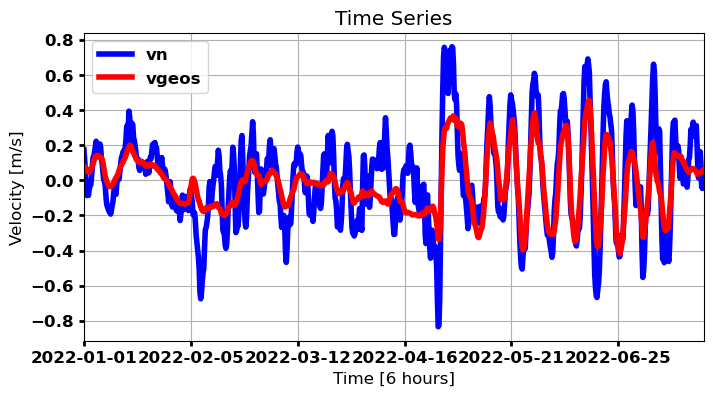

In [80]:
 # Plot time series
plt.figure(figsize=(8, 4))
plt.plot(df_2['time'], bouees_courant_v, color='Blue', label='vn', linewidth=4)
plt.plot(df_2['time'], satellitaires_courant_2, color='RED', label='vgeos', linewidth=4)
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Time Series')
plt.xlabel('Time [6 hours]')
plt.ylabel('Velocity [m/s]')
plt.grid(True)
plt.legend()
# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-07-23'))
ax.set_xticks(pd.date_range(start='2022-01-01', end='2022-07-23', freq='840H'))
ax.set_xticklabels(pd.date_range(start='2022-01-01', end='2022-07-23', freq='840H').strftime('%Y-%m-%d'), rotation=0)
plt.savefig("fig13 mode.png")
plt.show()

# Summarize

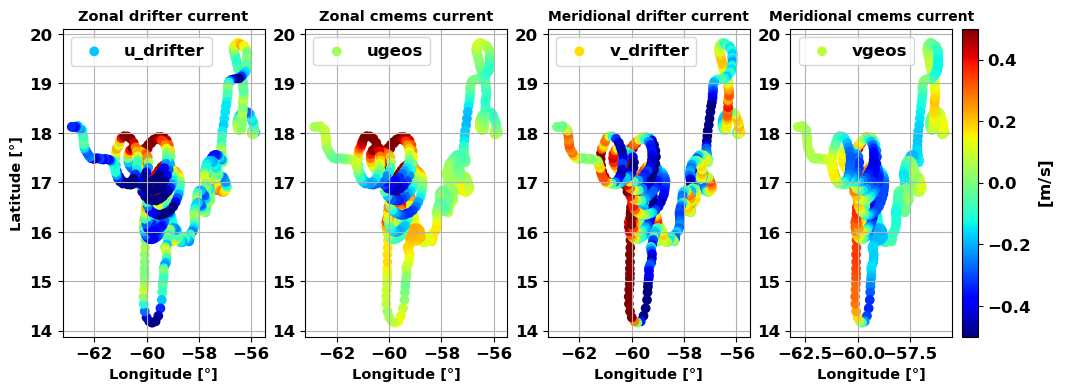

In [81]:
# Création du graphique avec trois sous-graphiques sur une ligne
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)  # Premier sous-graphique
plt.scatter(df_2['longitude'], df_2['latitude'], c= df_2['ve'],vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and legend
plt.title('Zonal drifter current', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.ylabel('Latitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend(['u_drifter'])

plt.subplot(1, 4, 2)  # Deuxième sous-graphique

plt.scatter(df_2['longitude'], df_2['latitude'], c= satellitaires_courant_1,vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and colorbar
plt.title('Zonal cmems current', fontsize=10.5, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend(['ugeos'])

plt.subplot(1, 4, 3)  # Troisième sous-graphique

plt.scatter(df_2['longitude'], df_2['latitude'], c= df_2['vn'],vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and legend
plt.title('Meridional drifter current', fontsize=10, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend(['v_drifter'])

plt.subplot(1, 4, 4) # Quatrième sous-graphique
plt.scatter(df_2['longitude'], df_2['latitude'], c= satellitaires_courant_2,vmin=-0.5, vmax=0.5, cmap='jet', marker='o')

# Add title, axis labels, grid and colorbar
plt.title('Meridional cmems current', fontsize=10, fontweight='bold')
plt.xlabel('Longitude [°]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend(['vgeos'])
plt.colorbar(label=r'$\mathbf{[m/s]}$' ) 
plt.savefig("fig14 mode.png")

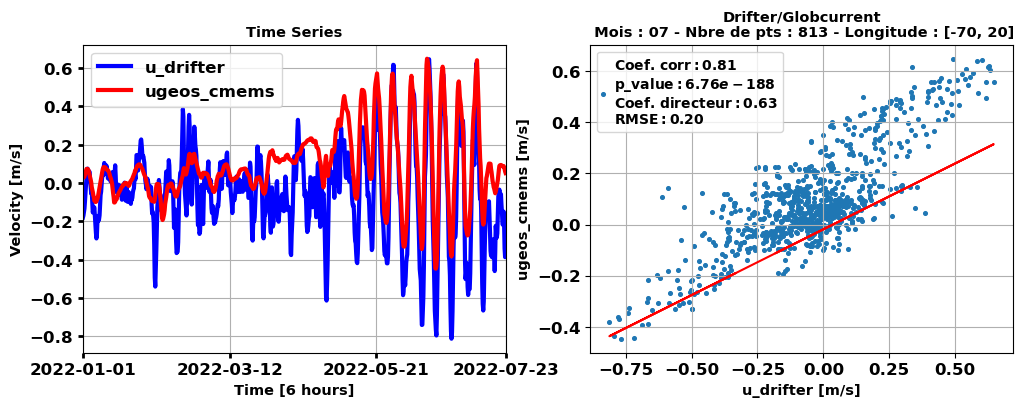

In [82]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Premier sous-graphique
plt.plot(df_2['time'], bouees_courant_u, color='Blue', label='u_drifter', linewidth=3)
plt.plot(df_2['time'], satellitaires_courant_1, color='RED', label='ugeos_cmems', linewidth=3)
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Time Series', fontsize=10.5, fontweight='bold')
plt.xlabel('Time [6 hours]', fontsize=10.5, fontweight='bold')
plt.ylabel('Velocity [m/s]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend()
# Configurer l'axe x
ax = plt.gca()
# Définir les limites de l'axe x en utilisant les dates min et max du DataFrame
min_date = df_2['time'].min()
max_date = df_2['time'].max()
ax.set_xlim(min_date, max_date)

# Ajouter les ticks de l'axe x avec une fréquence de 840 heures (35 jours)
# Assurez-vous que les ticks couvrent toute la période des données
xticks = pd.date_range(start=min_date, end=max_date, freq='1690H')
if xticks[-1] < max_date:  # Vérifier si la dernière tick est avant la date de fin
    xticks = xticks.append(pd.DatetimeIndex([max_date]))

ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=0)

# Ajuster les paramètres de la police
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
plt.scatter(bouees_courant_u,satellitaires_courant_1, s=7)
plt.plot(bouees_courant_u, slope*bouees_courant_u + intercept, color='red', label='Linear Regression')
plt.xlabel('u_drifter [m/s]', fontsize=10.5, fontweight='bold')
plt.ylabel('ugeos_cmems [m/s]', fontsize=10.5, fontweight='bold')

# Légende
legend_text = (
    r'$\text{Coef. corr} : 0.81$' + '\n'
    r'$\text{p_value} : 6.76e-188$' + '\n'
    r'$\text{Coef. directeur} : 0.63$' + '\n'
    r'$\text{RMSE} : 0.20$'
)

# Affichage de la légende
plt.legend([legend_text], title='', fontsize='small', title_fontsize='small', handlelength=0, loc="upper left")

# Titre
title_text = 'Drifter/Globcurrent\n Mois : 07 - Nbre de pts : 813 - Longitude : [-70, 20]'
plt.title(title_text, fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig15 mode.png")

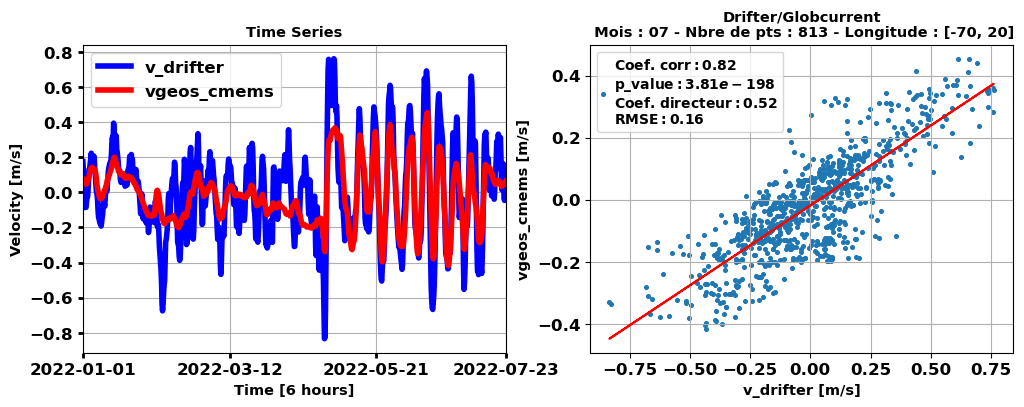

In [83]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Premier sous-graphique
plt.plot(df_2['time'], bouees_courant_v, color='Blue', label='v_drifter', linewidth=4)
plt.plot(df_2['time'], satellitaires_courant_2, color='RED', label='vgeos_cmems', linewidth=4)
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Time Series', fontsize=10.5, fontweight='bold')
plt.xlabel('Time [6 hours]', fontsize=10.5, fontweight='bold')
plt.ylabel('Velocity [m/s]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend()
# Configurer l'axe x
ax = plt.gca()
# Définir les limites de l'axe x en utilisant les dates min et max du DataFrame
min_date = df_2['time'].min()
max_date = df_2['time'].max()
ax.set_xlim(min_date, max_date)

# Ajouter les ticks de l'axe x avec une fréquence de 840 heures (35 jours)
# Assurez-vous que les ticks couvrent toute la période des données
xticks = pd.date_range(start=min_date, end=max_date, freq='1690H')
if xticks[-1] < max_date:  # Vérifier si la dernière tick est avant la date de fin
    xticks = xticks.append(pd.DatetimeIndex([max_date]))

ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=0)

# Ajuster les paramètres de la police
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
plt.scatter(bouees_courant_v,satellitaires_courant_2, s=7)
plt.plot(bouees_courant_v, slope*bouees_courant_v + intercept, color='red', label='Linear Regression')
plt.xlabel('v_drifter [m/s]', fontsize=10.5, fontweight='bold')
plt.ylabel('vgeos_cmems [m/s]', fontsize=10.5, fontweight='bold')

# Légende
legend_text = (
    r'$\text{Coef. corr} : 0.82$' + '\n'
    r'$\text{p_value} : 3.81e-198$' + '\n'
    r'$\text{Coef. directeur} : 0.52$' + '\n'
    r'$\text{RMSE} : 0.16$'
)

# Affichage de la légende
plt.legend([legend_text], title='', fontsize='small', title_fontsize='small', handlelength=0, loc="upper left")

# Titre
title_text = 'Drifter/Globcurrent\n Mois : 07 - Nbre de pts : 813 - Longitude : [-70, 20]'
plt.title(title_text, fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.savefig("fig16 mode.png")

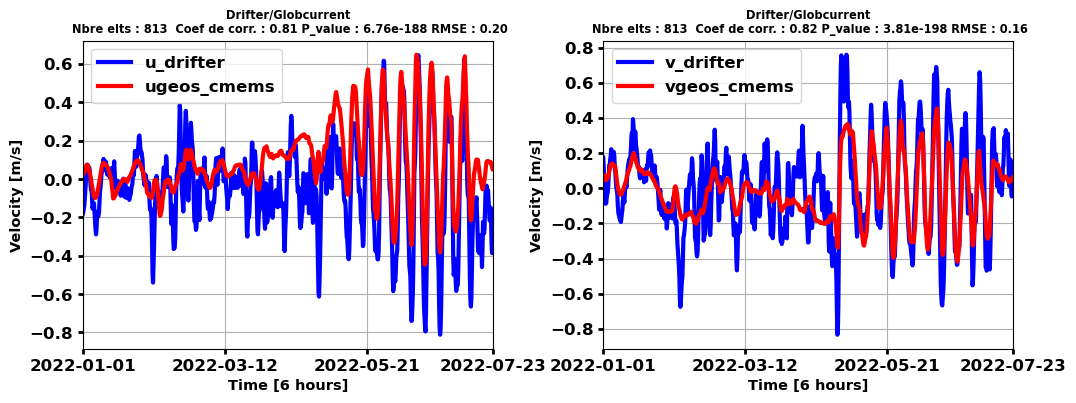

In [84]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Premier sous-graphique
plt.plot(df_2['time'], bouees_courant_u, color='Blue', label='u_drifter', linewidth=3)
plt.plot(df_2['time'], satellitaires_courant_1, color='RED', label='ugeos_cmems', linewidth=3)
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Time Series', fontsize=10.5, fontweight='bold')
plt.xlabel('Time [6 hours]', fontsize=10.5, fontweight='bold')
plt.ylabel('Velocity [m/s]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend()
# Configurer l'axe x
ax = plt.gca()
# Définir les limites de l'axe x en utilisant les dates min et max du DataFrame
min_date = df_2['time'].min()
max_date = df_2['time'].max()
ax.set_xlim(min_date, max_date)

# Ajouter les ticks de l'axe x avec une fréquence de 840 heures (35 jours)
# Assurez-vous que les ticks couvrent toute la période des données
xticks = pd.date_range(start=min_date, end=max_date, freq='1690H')
if xticks[-1] < max_date:  # Vérifier si la dernière tick est avant la date de fin
    xticks = xticks.append(pd.DatetimeIndex([max_date]))

ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=0)

# Ajuster les paramètres de la police
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

title_text = 'Drifter/Globcurrent\n Nbre elts : 813  Coef de corr. : 0.81 P_value : 6.76e-188 RMSE : 0.20'
plt.title(title_text, fontsize=8.2, fontweight='bold')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
plt.plot(df_2['time'], bouees_courant_v, color='Blue', label='v_drifter', linewidth=3)
plt.plot(df_2['time'], satellitaires_courant_2, color='RED', label='vgeos_cmems', linewidth=3)
plt.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

# Add title, axis labels, grid and legend 
plt.title('Time Series', fontsize=10.5, fontweight='bold')
plt.xlabel('Time [6 hours]', fontsize=10.5, fontweight='bold')
plt.ylabel('Velocity [m/s]', fontsize=10.5, fontweight='bold')
plt.grid(True)
plt.legend()
# Configurer l'axe x
ax = plt.gca()
# Définir les limites de l'axe x en utilisant les dates min et max du DataFrame
min_date = df_2['time'].min()
max_date = df_2['time'].max()
ax.set_xlim(min_date, max_date)

# Ajouter les ticks de l'axe x avec une fréquence de 840 heures (35 jours)
# Assurez-vous que les ticks couvrent toute la période des données
xticks = pd.date_range(start=min_date, end=max_date, freq='1690H')
if xticks[-1] < max_date:  # Vérifier si la dernière tick est avant la date de fin
    xticks = xticks.append(pd.DatetimeIndex([max_date]))

ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=0)

# Ajuster les paramètres de la police
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

title_text = 'Drifter/Globcurrent\n Nbre elts : 813  Coef de corr. : 0.82 P_value : 3.81e-198 RMSE : 0.16'
plt.title(title_text, fontsize=8.2, fontweight='bold')

plt.subplots_adjust( wspace=0.27)  # Ajuster hspace et wspace si nécessaire
plt.savefig("fig77 mode.png")

## Conclusion
 - Strong relationship between the variables ugeos (CMEMS Current) and u_drifter (Drifter Current).
 - Strong relationship  between vgeos (CMEMS Current) and v_drifter (Drifter Current).
 - Zonal component slightly dominated by the meridional component.
 - Altimetric current measurements are better and can be improved by considering certain components, notably Ekman and inertial components.